In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('chocolate.csv')

In [3]:
df.head()

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [4]:
df.tail()

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
1790,Zotter,Peru,647,2011,70%,Austria,3.75,,Peru
1791,Zotter,Congo,749,2011,65%,Austria,3.00,Forastero,Congo
1792,Zotter,Kerala State,749,2011,65%,Austria,3.50,Forastero,India
1793,Zotter,Kerala State,781,2011,62%,Austria,3.25,,India
1794,Zotter,"Brazil, Mitzi Blue",486,2010,65%,Austria,3.00,,Brazil


In [5]:
def renomear(string):
    return string.replace('\n', '')

df.columns = [renomear(col) for col in df.columns]

In [6]:
df.head()

,Company (Maker-if known),Specific Bean Originor Bar Name,REF,ReviewDate,CocoaPercent,CompanyLocation,Rating,BeanType,Broad BeanOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Company (Maker-if known)         1795 non-null   object 
 1   Specific Bean Originor Bar Name  1795 non-null   object 
 2   REF                              1795 non-null   int64  
 3   ReviewDate                       1795 non-null   int64  
 4   CocoaPercent                     1795 non-null   object 
 5   CompanyLocation                  1795 non-null   object 
 6   Rating                           1795 non-null   float64
 7   BeanType                         1794 non-null   object 
 8   Broad BeanOrigin                 1794 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 126.3+ KB


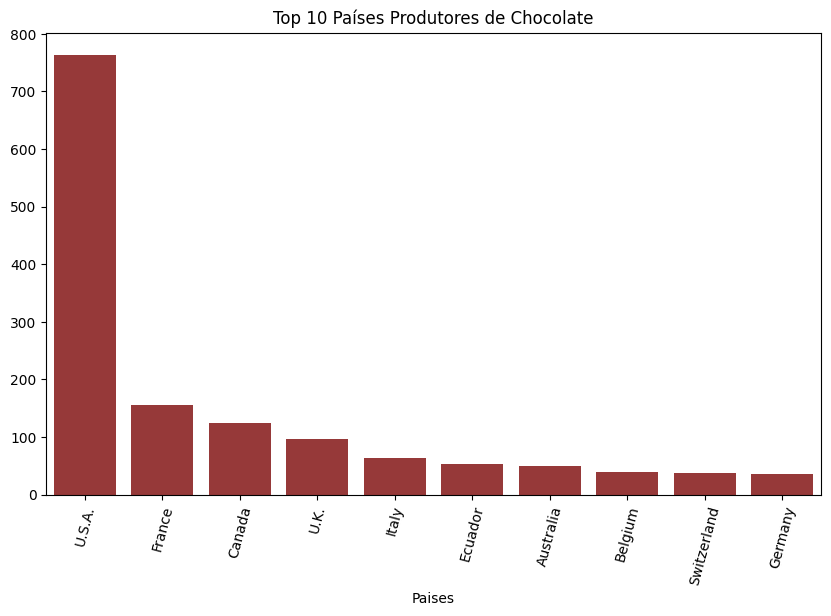

In [8]:
# 1 - Qual país é o maior produtor de chocolate?

df_pais = df['CompanyLocation'].value_counts().head(10)

plt.figure(figsize=(10,6))

sns.barplot(x=df_pais.index, y=df_pais.values, color='brown')
plt.title('Top 10 Países Produtores de Chocolate')
plt.xlabel('Paises')
plt.xticks(rotation= 75)
plt.show()

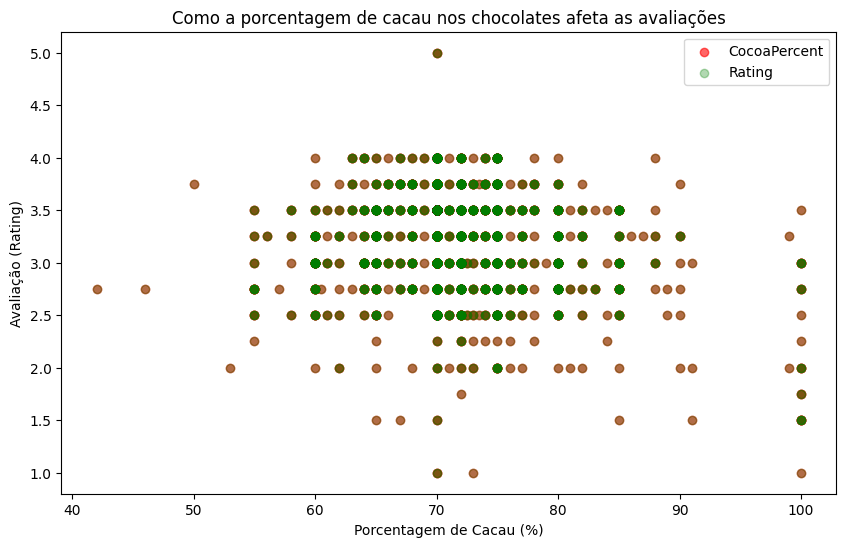

In [9]:
# 2 - Como a porcentagem de cacau nos chocolates afeta as avaliações?

df['CocoaPercent'] = df['CocoaPercent'].str.replace('%', '').str.strip()
df['CocoaPercent'] = df['CocoaPercent'].astype(float)

plt.figure(figsize=(10,6))

plt.scatter(df['CocoaPercent'], df['Rating'], c='red', alpha=0.6, label='CocoaPercent')
plt.scatter(df['CocoaPercent'], df['Rating'], c='green', alpha=0.3, label='Rating')

plt.xlabel('Porcentagem de Cacau (%)')
plt.ylabel('Avaliação (Rating)')
plt.title('Como a porcentagem de cacau nos chocolates afeta as avaliações')
plt.legend()
plt.show()


In [10]:
correlacao = df['CocoaPercent'].corr(df['Rating'])
print(f'Correlação de Pearson: {correlacao:.2f}')

Correlação de Pearson: -0.16


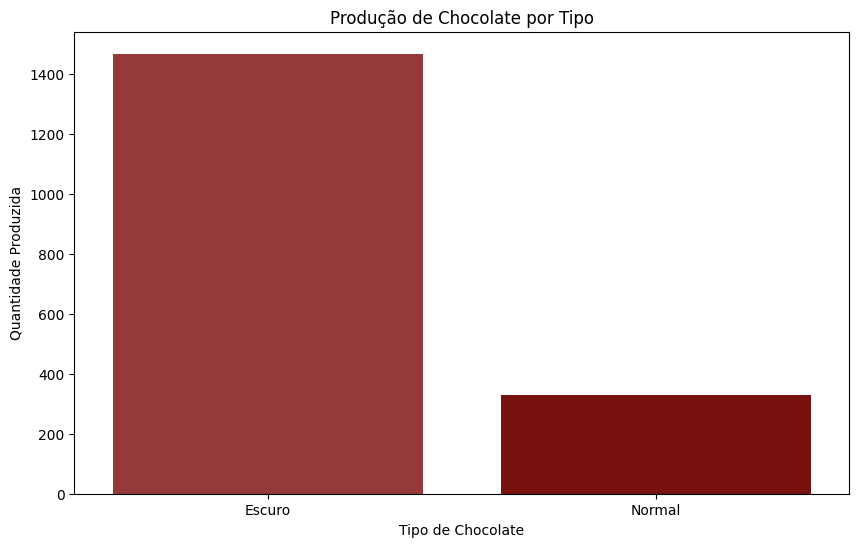

In [11]:
# 3 - Como varia a produção de chocolate de acordo com o tipo (normal ou escuro).

df['Type'] = df['CocoaPercent'].apply(lambda x: 'Escuro' if x >= 70 else 'Normal')
producao = df['Type'].value_counts()

plt.figure(figsize=(10, 6))

sns.barplot(x=producao.index, y=producao.values, hue=producao.index, palette=['brown', 'darkred'])

plt.xlabel('Tipo de Chocolate')
plt.ylabel('Quantidade Produzida')
plt.title('Produção de Chocolate por Tipo')
plt.show()


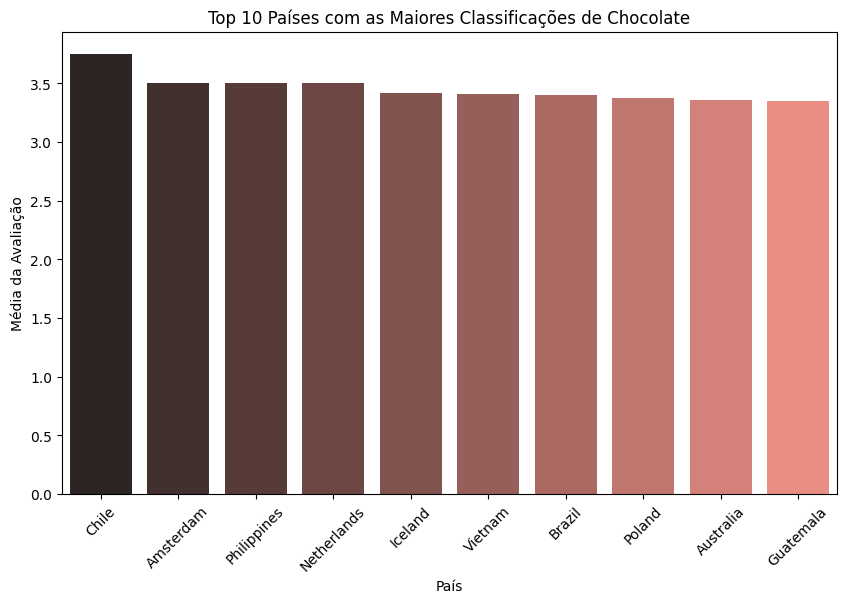

In [12]:
# 4 - Qual país tem as classificações de chocolate mais altas?

# Calcular a média das classificações por país
media_classificacao_por_pais = df.groupby('CompanyLocation')['Rating'].mean()
media_classificacao_por_pais = media_classificacao_por_pais.sort_values(ascending=False)
top_paises = media_classificacao_por_pais.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_paises.index, y=top_paises.values, hue=top_paises.index, palette='dark:salmon')

plt.xlabel('País')
plt.ylabel('Média da Avaliação')
plt.title('Top 10 Países com as Maiores Classificações de Chocolate')
plt.xticks(rotation=45)
plt.show()


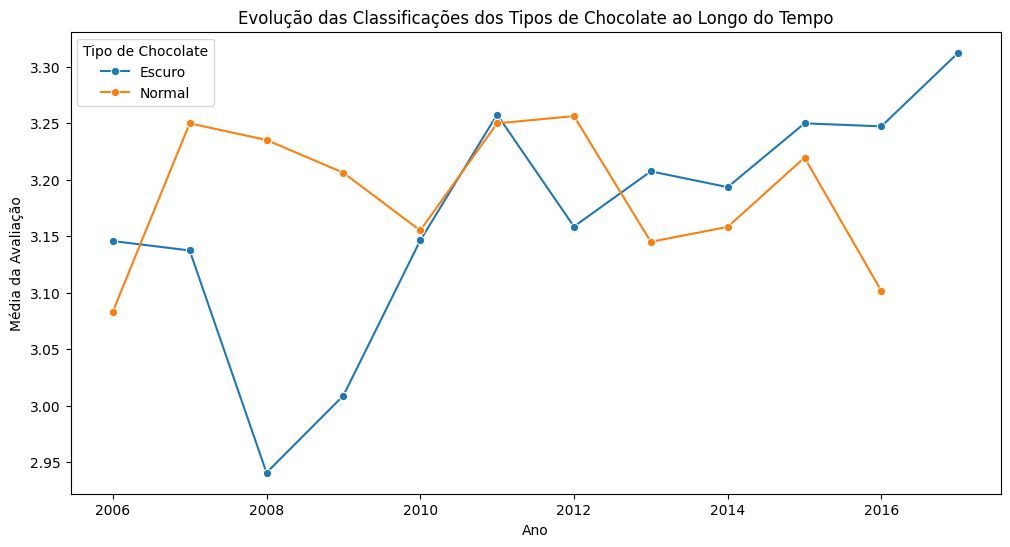

In [13]:
# 6 - Como as classificações dos diferentes tipos de chocolate mudam ao longo do tempo?

media_classificacao_por_ano_tipo = df.groupby(['ReviewDate', 'Type'])['Rating'].mean().reset_index()

plt.figure(figsize=(12, 6))

sns.lineplot(data=media_classificacao_por_ano_tipo, x='ReviewDate', y='Rating', hue='Type', marker='o')

plt.xlabel('Ano')
plt.ylabel('Média da Avaliação')
plt.title('Evolução das Classificações dos Tipos de Chocolate ao Longo do Tempo')
plt.legend(title='Tipo de Chocolate')
plt.show()